# Setup

In [1]:
#imports
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, RocCurveDisplay

In [2]:
INPUT_DIR = "../../data/input/"
OUTPUT_DIR = "../../data/output/"

# Load Data

In [3]:
train_sets_undersample = []
train_sets_smote = []
test_sets = []

for i in range(10):
    train_sets_undersample.append( pd.read_csv(OUTPUT_DIR + "train_set{}_undersampling.csv".format(i)) )
    train_sets_smote.append(  pd.read_csv(OUTPUT_DIR + "train_set{}_smote.csv".format(i)) )
    test_sets.append( pd.read_csv(OUTPUT_DIR + "test_set{}.csv".format(i)) )

# Define the Model

In [4]:
max_iter = 10000

A useful function for extraxting x and x variables from a DataFrame:

In [5]:
def get_x(dataset: pd.DataFrame):
    return dataset.drop("Bug", axis=1)

def get_y(dataset: pd.DataFrame):
    return dataset.Bug

def split_xy(dataset: pd.DataFrame):
    return get_x(dataset), get_y(dataset)

# Train the Models

In [6]:
models_undersample = []
for ts in train_sets_undersample:
    model = LogisticRegression(max_iter=max_iter)
    x, y = split_xy(ts)
    model.fit(x, y)
    models_undersample.append(model)

models_smote = []
for ts in train_sets_smote:
    model = LogisticRegression(max_iter=max_iter)
    x, y = split_xy(ts)
    model.fit(x, y)
    models_smote.append(model)

# Evaluate the Models

Lets generate the predictions for all the models using the respective test sets and join then.

In [10]:
y_hat_undersample = np.concatenate([models_undersample[i].predict_proba(get_x(test_sets[i]))[:,1] for i in range(10)])
y_hat_smote       = np.concatenate([models_smote[i].predict_proba(get_x(test_sets[i]))[:,1] for i in range(10)])
y_test            = pd.concat([get_y(ts) for ts in test_sets], ignore_index=True)

Lets plot the ROC for our logistic regression model trained on undersampled balanced data.

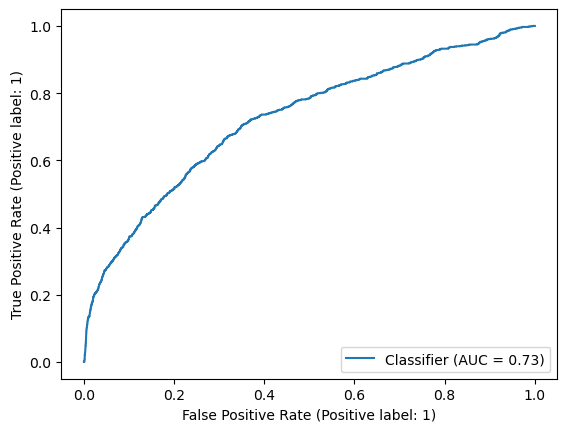

In [8]:
RocCurveDisplay.from_predictions(y_test, y_hat_undersample)

Lets plot the ROC for our logistic regression model trained on SMOTE balanced data.

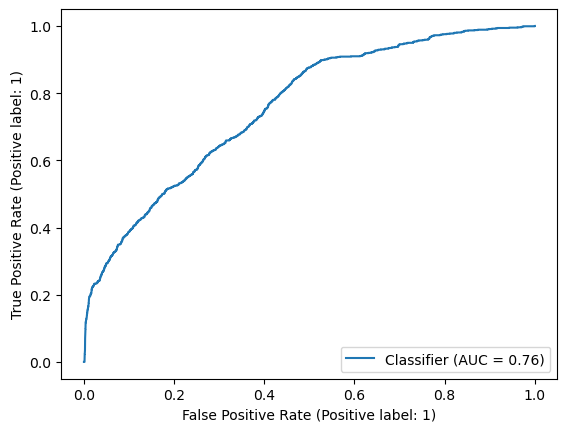

In [9]:

RocCurveDisplay.from_predictions(y_test, y_hat_smote)

From these metrics, we can infer that the logistic regression model trained using SMOTE balanced data performs slightly better than the one trained using undersampled data as it has a greater AUC.